In [71]:
# -*- coding: utf-8 -*-
# Problem Set 5: Experimental Analysis
# Name: 
# Collaborators (discussion):
# Time:

import pylab
import random
import re
import numpy

# cities in our weather data
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

TRAINING_INTERVAL = range(1961, 2010)
TESTING_INTERVAL = range(2010, 2016)

"""
Begin helper code
"""
class Climate(object):
    """
    The collection of temperature records loaded from given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}

        f = open(filename, 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature
            
        f.close()

    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a 1-d pylab array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return pylab.array(temperatures)
    # def  get_monthly_temp(self,city,year,month):
    #   temperatures = []
    #   assert city in self.rawdata,'provided city is not available '
    #   assert year in self.rawdata[city],'provided year is not available '
    #   assert month in self.rawdata[city][year],'year not available '
    #   for day in range(1,32):
    #     if day in self.rawdata[city][year][month]:
    #       temperatures.append(self.rawdata[city][year][month][day])
    #   return temperatures

    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]


In [72]:
def se_over_slope(x, y, estimated, model):
    """
    For a linear regression model, calculate the ratio of the standard error of
    this fitted curve's slope to the slope. The larger the absolute value of
    this ratio is, the more likely we have the upward/downward trend in this
    fitted curve by chance.
    
    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d pylab array of values estimated by a linear
            regression model
        model: a pylab array storing the coefficients of a linear regression
            model

    Returns:
        a float for the ratio of standard error of slope to slope
    """
    assert len(y) == len(estimated)
    assert len(x) == len(estimated)
    EE = ((estimated - y)**2).sum()
    var_x = ((x - x.mean())**2).sum()
    SE = pylab.sqrt(EE/(len(x)-2)/var_x)
    return SE/model[0]


In [73]:
data = Climate('data.csv')

In [74]:
def generate_models(x, y, degs):
  models = [ pylab.polyfit(x,y,i) for i in degs ]
  return models
  # """
  #   Generate regression models by fitting a polynomial for each degree in degs
  #   to points (x, y).

  #   Args:
  #       x: an 1-d pylab array with length N, representing the x-coordinates of
  #           the N sample points
  #       y: an 1-d pylab array with length N, representing the y-coordinates of
  #           the N sample points
  #       degs: a list of degrees of the fitting polynomial

  #   Returns:
  #       a list of pylab arrays, where each array is a 1-d array of coefficients
  #       that minimizes the squared error of the fitting polynomial
  #   """
  #   # TODO
  #   pass

In [75]:
def r_squared(y, estimated):
  error = ((y - estimated)**2).sum()
  mean_error = error/len(y)
  return 1 - mean_error/numpy.var(y)

    # """
    # Calculate the R-squared error term.
    
    # Args:
    #     y: 1-d pylab array with length N, representing the y-coordinates of the
    #         N sample points
    #     estimated: an 1-d pylab array of values estimated by the regression
    #         model

    # Returns:
    #     a float for the R-squared error term
    # """
    # # TODO
    # pass

In [76]:
def evaluate_models_on_training(x, y, models):
  for i in range(len(models)):
    pylab.plot(x,y,'bo',label='data')
    estimated = pylab.polyval(models[i], x)
    error = r_squared(y, estimated)
    pylab.plot(x, estimated,'r--')
    pylab.xlabel('Years')
    pylab.ylabel('Temperature')
    if len(models[i])==2:
      se_slope = se_over_slope(x, y, estimated, models[i])
      pylab.title('Fit of degree '   + str(len(models[i])-1) + ', R2 = ' + str(round(error, 5)) +  '\n' + 'SE/SLOPE = ' + str(se_slope))
    else:
      pylab.title('Fit of degree '   + str(len(models[i])-1) + ', R2 = ' + str(round(error, 5)))
    pylab.show()



    

    """
    For each regression model, compute the R-squared value for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points,
        and SE/slope (if degree of this model is 1 -- see se_over_slope). 

    Args:
        x: an 1-d pylab array with length N, representing the x-coordinates of
            the N sample points
        y: an 1-d pylab array with length N, representing the y-coordinates of
            the N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a pylab array storing the coefficients of
            a polynomial.

    Returns:
        None
    """
 

In [77]:
x = random.sample(range(20,60),30)
y = [i * 2 + random.random()  for i in x]
x = pylab.array(x)
y = pylab.array(y)

In [78]:
models = generate_models(x, y, (1,2,3))
models

[array([1.9956701 , 0.67711731]),
 array([-4.66378747e-04,  2.03261776e+00,  1.43027141e-02]),
 array([ 1.27472997e-06, -6.17305163e-04,  2.03824886e+00, -5.12198038e-02])]

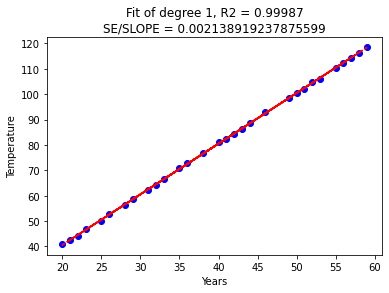

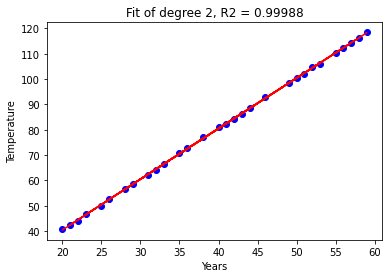

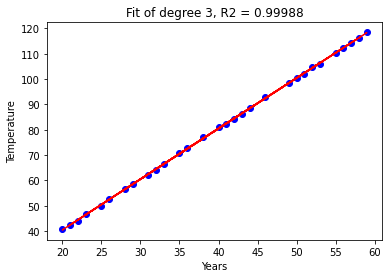

In [79]:
evaluate_models_on_training(x, y, models)

In [80]:
def trends_random_day(data):
  # selected_day = random.choice(range(1,30))
  # selected_month  = random.choice(range(1,13))
  temperature_range = []
  for i in TRAINING_INTERVAL :
    temperature_range.append(data.get_daily_temp('NEW YORK',1,10,i))
  pylab.plot(TRAINING_INTERVAL,temperature_range,'bo')
  return TRAINING_INTERVAL,temperature_range




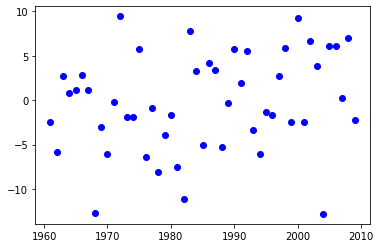

In [81]:
x,y = trends_random_day(data)

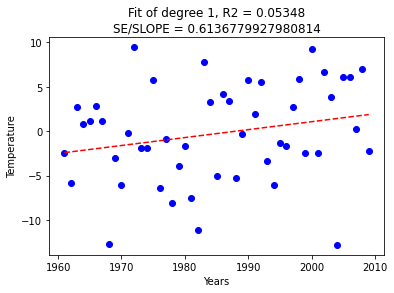

In [82]:
x = pylab.array(x)
y = pylab.array(y)
model = generate_models(x,y,[1])
evaluate_models_on_training(x,y,model)

In [83]:
def mean(x):
  return sum(x)/len(x)

In [84]:
def annual_mean(data,city,years,Plot = False):
  temp = [data.get_yearly_temp(city,i) for i in years]
  means = [mean(i) for i in temp]
  if Plot:
    pylab.plot(TRAINING_INTERVAL,means,'bo')
  return TRAINING_INTERVAL,means




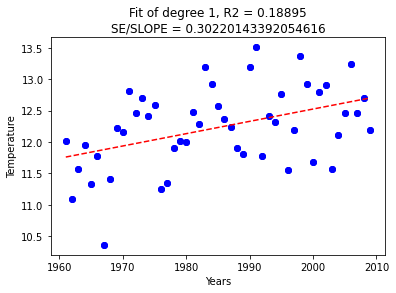

In [85]:
x,y=annual_mean(data,'NEW YORK',TRAINING_INTERVAL,True)
x = pylab.array(x)
y = pylab.array(y)
model = generate_models(x,y,[1])
evaluate_models_on_training(x,y,model)

In [86]:
def gen_cities_avg(climate, multi_cities, years):
  res =[]
  for i in years:
    cities_yearly  = [climate.get_yearly_temp(j,i) for j in multi_cities]
    res.append(mean([mean(i) for i in cities_yearly]))
  return res





In [98]:
means =gen_cities_avg(data, CITIES,TRAINING_INTERVAL)

In [88]:
gen_cities_avg(data, ['TAMPA', 'DALLAS'],TESTING_INTERVAL)

[20.804041095890412,
 22.03910958904109,
 22.27206284153006,
 21.311369863013706,
 20.881232876712332,
 22.07794520547944]

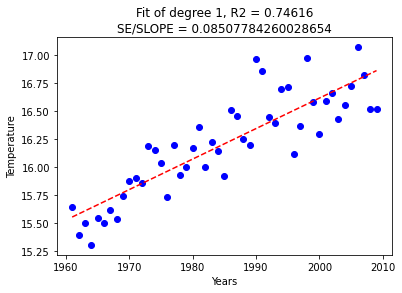

In [133]:
y = gen_cities_avg(data, CITIES,TRAINING_INTERVAL)
y = pylab.array(y)
x = pylab.array(TRAINING_INTERVAL)
models = generate_models(x,y,[1])
evaluate_models_on_training(x,y,models)

In [90]:
import numpy

In [91]:
def moving_average(list,window_size = 3):
  res = []
  for i in range(len(list)):
    if i<window_size-1:
      if i ==0:
        res.append(list[0])
      else :
        res.append(numpy.mean(list[:i+1]))
    else:
      res.append(numpy.mean(list[i-window_size + 1:i+1]))
  return res



In [92]:
def rmse(y, estimated):
  error = ((y-estimated)**2).sum()
  return (error/len(y))**0.5

In [149]:
def evaluate_models_on_testing(x, y, models):
  for i in range(len(models)):
    pylab.plot(x,y,'bo',label='data')
    estimated = pylab.polyval(models[i], x)
    error = rmse(y, estimated)
    pylab.plot(x, estimated,'r--')
    pylab.xlabel('Years')
    pylab.ylabel('Temperature')
    pylab.title('Fit of degree '   + str(len(models[i])-1) + ', RMSE = ' + str(round(error, 5)))
    pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


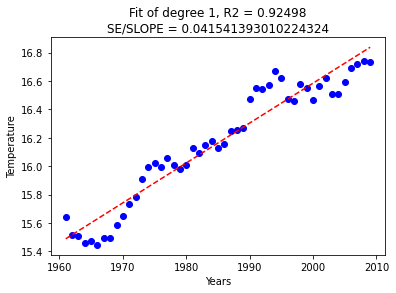

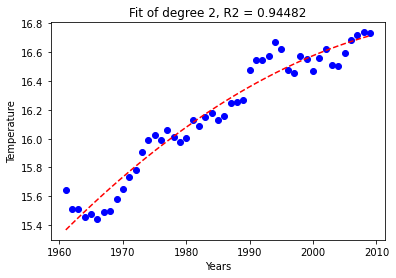

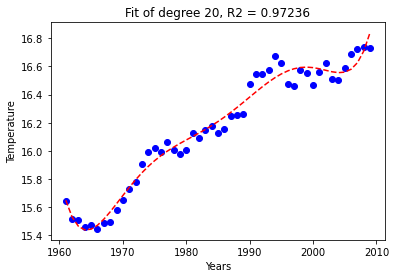

In [134]:
y = pylab.array(moving_average(y,window_size = 5))
x= pylab.array(TRAINING_INTERVAL)
models = generate_models(x,y,(1,2,20))
evaluate_models_on_training(x,y,models)

In [136]:
TESTING_INTERVAL

range(2010, 2016)

In [160]:
y_test =gen_cities_avg(data,CITIES,TESTING_INTERVAL)
y_test =pylab.array(moving_average(y_test,window_size = 5))
x = pylab.array(TESTING_INTERVAL)


In [161]:
y_test

array([16.75950424, 16.80849967, 17.05960001, 16.95899387, 16.93619314,
       17.09321336])

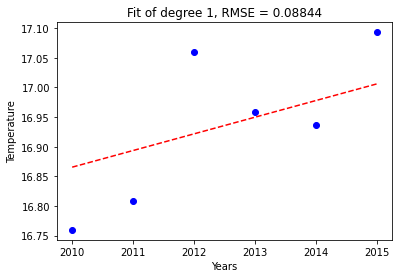

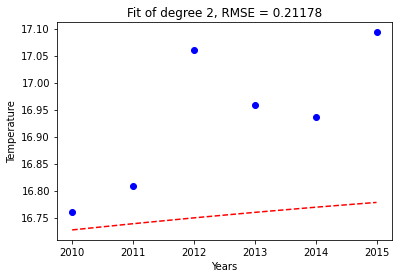

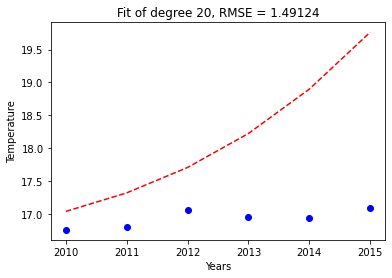

In [162]:
evaluate_models_on_testing(x,y_test,models)

In [119]:
def calc_pop_avg(populations, n):
    return float(sum([i[n] for i in populations])/len(populations))

In [114]:
def gen_std_devs(climate, multi_cities, years):
  std = []
  for i in years:
    draft = [data.get_yearly_temp(j,i) for  j in multi_cities]
    means = [calc_pop_avg(draft,i)  for i in   range(0,365)]
    std.append(numpy.std(means))
  return std



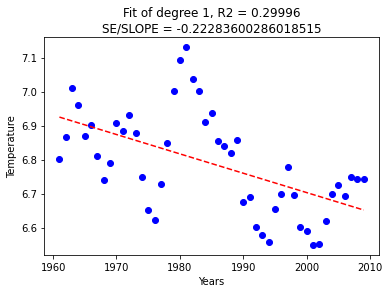

In [152]:
draft = gen_std_devs(data,CITIES,TRAINING_INTERVAL)
draft  = pylab.array(moving_average(draft,window_size =5))
x = pylab.array(TRAINING_INTERVAL)
model = generate_models(x,draft,[1])
evaluate_models_on_training(x,draft,model)